In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib import cm
from shapely import geometry
from descartes import PolygonPatch
import math

from aux_func_States import equals

from PIL import Image

In [2]:
df = pd.read_csv("/home/madeline/Research/EMT_MR/crosstalk/analysis/data/crosstalk_uh_u3n.txt")

In [3]:
df.columns

Index([u'AS', u'AZ', u'AU', u'HS', u'HU', u'INPUT', u'U3M', u'U3N', u'UH',
       u'UHV', u'E', u'EM', u'M', u'W', u'WO', u'O', u'M/W', u'M/WO', u'M/O',
       u'EM/W', u'EM/WO', u'EM/O', u'E/W', u'E/WO', u'E/O', u'nics'],
      dtype='object')

In [29]:
df.columns[16:-1]

Index([u'M/W', u'M/WO', u'M/O', u'EM/W', u'EM/WO', u'EM/O', u'E/W', u'E/WO',
       u'E/O'],
      dtype='object')

In [30]:
xun_ok=[]
for i in range(4):
       for j in range(1,4):
               for k in range(4):
                     if (j==1 and k<=0) or (j==2 and k<=1) or (j==3):
                              xun_ok+=[i*100+j*10+k]

inds = []
for el in xun_ok:
    inds += list(np.argwhere(df['UHV'].values==el)[:,0])


In [31]:
np.round(df.values[inds],3)[:,8]

array([0.039, 0.086, 0.695, ..., 0.036, 0.042, 0.172])

In [32]:
usefulData = np.round(df.values[inds],4)
states = np.unique(usefulData[:,16:-1],axis=0)
print usefulData.shape
print states

(1715, 26)
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [33]:
tags = { 0:'M/W' ,1:'M/WO', 2:'M/O',
        3:'EM/W', 4:'EM/WO', 5:'EM/O',
        6:'E/W', 7:'E/WO', 8:'E/O'}
results = { 'M/W':{'x':[],'y':[]} ,'M/WO':{'x':[],'y':[]}, 'M/O':{'x':[],'y':[]},
           'EM/W':{'x':[],'y':[]}, 'EM/WO':{'x':[],'y':[]}, 'EM/O':{'x':[],'y':[]},
           'E/W':{'x':[],'y':[]}, 'E/WO':{'x':[],'y':[]}, 'E/O':{'x':[],'y':[]}}


eps = 0.00001
xbreaks,ybreaks=[],[]
for el in states:
    for i in range(len(el)):
        tmp = usefulData[:,16:-1]
        if i==0:
            locs = np.argwhere(el[i]==tmp[:,i])[:,0]
        else:
            locs2 = np.argwhere(el[i]==tmp[:,i])[:,0]
            locs = np.intersect1d(locs,locs2)

    xv = usefulData[locs,7]
    yv = usefulData[locs,8]        
    
    sloc = np.argwhere(el==1)[:,0]
    
    for i in sloc:
        ss = tags[i]
        results[ss]['x'] +=[np.min(xv),np.max(xv)]
        xbreaks +=[np.min(xv),np.max(xv)]
        results[ss]['y'] +=[np.min(yv),np.max(yv)]
        ybreaks +=[np.min(yv),np.max(yv)]
 

xbreaks = np.sort(np.unique(xbreaks))
ybreaks = np.sort(np.unique(ybreaks))

In [34]:
print xbreaks
print ybreaks

[0.  0.4 0.9]
[0.0024 0.0052 0.1238 0.2813 0.3675 0.5853 0.5866 0.6926 0.6949 0.6956
 0.6958 0.9595 0.9596]


In [35]:
x1,x2,y1,y2=[],[],[],[]
finalRes=[]
for i in range(len(xbreaks)-1):
    for j in range(len(ybreaks)-1):

        tmpR = []
        for el in results:
            xlow,xhigh,ylow,yhigh = False,False,False,False
            if i<len(xbreaks)-1 and len(results[el]['x'])>0:
                xlow = results[el]['x'][0]<xbreaks[i]+eps
                xhigh = results[el]['x'][1]>xbreaks[i+1]-eps
            elif   len(results[el]['x'])>0:
                xlow = results[el]['x'][0]<xbreaks[i]+eps
                xhigh=True
            if j<len(ybreaks)-1 and len(results[el]['y'])>0:
                ylow = results[el]['y'][0]<ybreaks[j]+eps
                yhigh = results[el]['y'][1]>ybreaks[j+1]-eps
            elif len(results[el]['y'])>0:
                ylow = results[el]['y'][0]<ybreaks[j]+eps
                yhigh=True
                

            #print xlow,xhigh,results[el]['x']
            #print ylow,yhigh,results[el]['y']     ,'\n'     
            if xlow and xhigh and ylow and yhigh:
                tmpR+=[el]
        if len(tmpR)>0:# and xlow and xhigh and ylow and yhigh:
                x1+=[xbreaks[i]]
                x2+=[xbreaks[i+1]]                
                y1+=[ybreaks[j]]                
                y2+=[ybreaks[j+1]]
                finalRes+=[tmpR]

24
0.0 0.4 0.0024 0.0052 ['E/O']
0.0 0.4 0.0052 0.1238 ['EM/O', 'E/O']
0.0 0.4 0.1238 0.2813 ['EM/O', 'M/O', 'E/O']
0.0 0.4 0.2813 0.3675 ['EM/O', 'M/O', 'E/WO', 'E/O']
0.0 0.4 0.3675 0.5853 ['EM/O', 'M/O', 'E/WO', 'E/O', 'EM/WO']
0.0 0.4 0.5853 0.5866 ['EM/O', 'M/O', 'E/WO', 'EM/WO']
0.0 0.4 0.5866 0.6926 ['EM/O', 'M/O', 'EM/WO']
0.0 0.4 0.6926 0.6949 ['M/O', 'EM/WO']
0.0 0.4 0.6949 0.6956 ['M/O']
0.0 0.4 0.6956 0.6958 ['M/O', 'M/WO']
0.0 0.4 0.6958 0.9595 ['M/O', 'M/WO', 'M/W']
0.0 0.4 0.9595 0.9596 ['M/WO', 'M/W']
0.4 0.9 0.0024 0.0052 ['E/O']
0.4 0.9 0.0052 0.1238 ['EM/O', 'E/O']
0.4 0.9 0.1238 0.2813 ['EM/O', 'M/O', 'E/O']
0.4 0.9 0.2813 0.3675 ['EM/O', 'M/O', 'E/O']
0.4 0.9 0.3675 0.5853 ['EM/O', 'M/O', 'E/O']
0.4 0.9 0.5853 0.5866 ['EM/O', 'M/O']
0.4 0.9 0.5866 0.6926 ['EM/O', 'M/O']
0.4 0.9 0.6926 0.6949 ['M/O']
0.4 0.9 0.6949 0.6956 ['M/O']
0.4 0.9 0.6956 0.6958 ['M/O', 'M/WO']
0.4 0.9 0.6958 0.9595 ['M/O', 'M/WO', 'M/W']
0.4 0.9 0.9595 0.9596 ['M/WO', 'M/W']


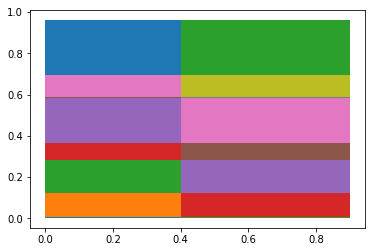

In [36]:
print len(x1)
for i in range(len(x1)):
    plt.fill_between([x1[i],x2[i]],y1[i],y2[i])
    print x1[i],x2[i],y1[i],y2[i],finalRes[i]

In [37]:
colLst=list(np.unique(finalRes))



In [12]:
name='data_uh_u3n'
fileo = open("data/"+name+".txt",'w')

fileo.write("X1,X2,Y1,Y2,color\n")

for i in range(len(x1)):

    for j in range(len(colLst)):
        if equals(finalRes[i],colLst[j]):
            colN = j+1
    fileo.write("%s,%s,%s,%s,%s\n" %(x1[i],x2[i],y1[i],y2[i],colN))

fileo.close()
#####################33
fileo = open("data/"+name+"_HHOnlhy.txt",'w')

fileo.write("X1,X2,Y1,Y2\n")

for i in range(len(x1)):
    if equals(finalRes[i],['EM/WO']):
        fileo.write("%s,%s,%s,%s\n" %(x1[i],x2[i],y1[i],y2[i]))

fileo.close()
#############################
fileo = open("data/"+name+"_HHexists.txt",'w')

fileo.write("X1,X2,Y1,Y2\n")

for i in range(len(x1)):
    if 'EM/WO' in finalRes[i]:
        fileo.write("%s,%s,%s,%s\n" %(x1[i],x2[i],y1[i],y2[i]))

fileo.close()
#############################
fileo = open("data/"+name+"_legend.txt",'w')
fileo.write('E/O,E/W,E/WO,EM/O,EM/W,EM/WO,M/O,M/W,M/WO,E,EM,M,O,WO,W,t3\n')

for i in range(len(colLst)):
    tmp=[]
    for el in ['E/O','E/W','E/WO','EM/O','EM/W','EM/WO','M/O','M/W','M/WO']:
        if el in colLst[i]:
            fileo.write("1,")
            tmp+=el.split("/")
        else:
            fileo.write("0,")            
    for el in ['E','EM','M','O','WO','W']:
        if el in tmp:
            fileo.write("1,")
        else:
            fileo.write("0,")
    fileo.write("%s\n" %(i+1))
fileo.close()